<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">Introduction to American Sign Language (ASL)
    </h1>
</div>

<div style="background-color:#e6f2ff; padding:30px; border-radius:8px; box-shadow:0 4px 10px rgba(0,0,0,0.1); margin-bottom:30px;">
  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    American Sign Language (ASL) is a complete natural language that serves as the predominant sign language of Deaf communities. 
    It uses hand gestures, facial expressions, and body movements to convey meaning.
  </p> 
  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    Each letter of the English alphabet has a corresponding ASL hand sign, enabling people to spell out words and communicate effectively without spoken language.
  </p>  
  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    In this project, we aim to build an AI system capable of recognizing ASL letters from input images and predicting the correct letter or symbol (including Space, Delete, and Nothing).
  </p>  
</div>

![Image](https://github.com/user-attachments/assets/e9032e37-e1f0-4ee7-a860-2803dd41dcb1)

<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">Project Introduction and Approach
    </h1>
</div>

<div style="background-color:#e6f2ff; padding:30px; border-radius:8px; box-shadow:0 4px 10px rgba(0,0,0,0.1); margin-bottom:30px;">
  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    <b>Objective:</b> To build a system that detects a given ASL input image and outputs what letter (A-Z) or special sign (Space, Delete, Nothing) it represents.
  </p> 

  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    <b>Step-by-Step Approach:</b><br><br>
    1. <b>Data Loading:</b> Loaded and organized the training and testing datasets containing ASL images.<br>
    2. <b>Data Preprocessing:</b> Resized images and applied data augmentation.<br>
    3. <b>Model Building:</b> Built a CNN model using Conv2D, MaxPooling, Flatten, Dense, and Dropout layers.<br>
    4. <b>Training:</b> Trained the model on limited steps first for fast evaluation.<br>
    5. <b>Evaluation:</b> Evaluated model performance using validation accuracy and loss.<br>
    6. <b>Saving the Model:</b> Saved the trained model for future prediction.<br>
    7. <b>Testing:</b> Tested the model on random images to predict their ASL letter.
  </p>  
</div>


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">Dataset Description
    </h1>
</div>

<div style="background-color:#e6f2ff; padding:30px; border-radius:8px; box-shadow:0 4px 10px rgba(0,0,0,0.1); margin-bottom:30px;">
  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    <b>Total Classes:</b> 29 (26 letters A-Z + 3 additional classes: Space, Delete, Nothing)
  </p> 

  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    <b>Training Set:</b> 
    <br>• 29 folders (one per class) 
    <br>• Each folder contains around 3000 images
    <br>• Images are 200x200 pixels, RGB format
  </p>

  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    <b>Testing Set:</b> 
    <br>• One image per class (A_test to Z_test, Space_test, Nothing_test)
    <br>• 'Delete' class image missing in original test set
  </p>

  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    ✅ The dataset is clean and ideal for deep learning model training.
  </p>  
</div>


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹 Step 1: Import Libraries
    </h1>
</div>

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 2: Set Paths and Image Size
    </h1>
</div>


In [44]:
train_dir = r"D:\Jupyter python\New Datasets\Unified Mentor\ASL_detection\ASL_Dataset\asl_alphabet_train"
test_dir = r"D:\Jupyter python\New Datasets\Unified Mentor\ASL_detection\ASL_Dataset\asl_alphabet_test"
img_size = 200

<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 3: Visualize Some Training Images
    </h1>
</div>

 

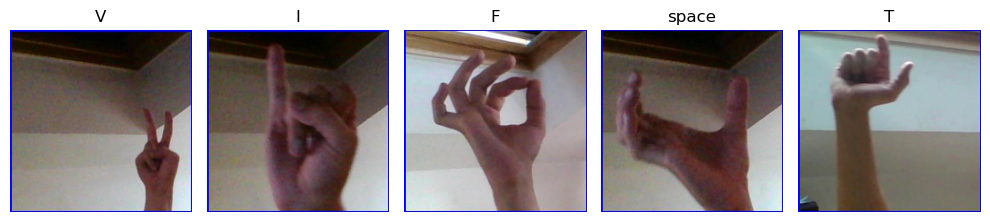

In [45]:
import random

plt.figure(figsize=(10, 6))
folders = os.listdir(train_dir)
for i in range(5):
    label = random.choice(folders)
    path = os.path.join(train_dir, label)
    img_name = random.choice(os.listdir(path))
    img_path = os.path.join(path, img_name)
    img = Image.open(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")
plt.tight_layout()
plt.show()


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 4: Load Data with ImageDataGenerator
    </h1>
</div>

 

In [46]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

# Training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation set
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 5: Build a CNN Model
    </h1>
</div>

 

In [47]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')  # 29 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 128)     

<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 6: Train the Model
    </h1>
</div>

 

<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 7: Train on a Smaller Subset (Quick Test Model)
    </h1>
</div>

 

In [48]:
history = model.fit(
    train_generator,       
    epochs=10,              
    steps_per_epoch=100,    
    validation_data=val_generator,  
    validation_steps=50    
)

Epoch 1/10
100/100 [==============================] - 396s 4s/step - loss: 3.3311 - accuracy: 0.0909 - val_loss: 3.1259 - val_accuracy: 0.1244
Epoch 2/10
100/100 [==============================] - 413s 4s/step - loss: 2.5421 - accuracy: 0.2825 - val_loss: 2.6509 - val_accuracy: 0.2575
Epoch 3/10
100/100 [==============================] - 404s 4s/step - loss: 1.9261 - accuracy: 0.4441 - val_loss: 2.2214 - val_accuracy: 0.3344
Epoch 4/10
100/100 [==============================] - 411s 4s/step - loss: 1.5044 - accuracy: 0.5462 - val_loss: 2.1708 - val_accuracy: 0.3356
Epoch 5/10
100/100 [==============================] - 407s 4s/step - loss: 1.3281 - accuracy: 0.5891 - val_loss: 1.9903 - val_accuracy: 0.3787
Epoch 6/10
100/100 [==============================] - 415s 4s/step - loss: 1.0423 - accuracy: 0.6712 - val_loss: 1.6698 - val_accuracy: 0.4363
Epoch 7/10
100/100 [==============================] - 443s 4s/step - loss: 0.8990 - accuracy: 0.7141 - val_loss: 1.6045 - val_accuracy: 0.5000

<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 8: Plot Training vs Validation Accuracy and Loss
    </h1>
</div>

 

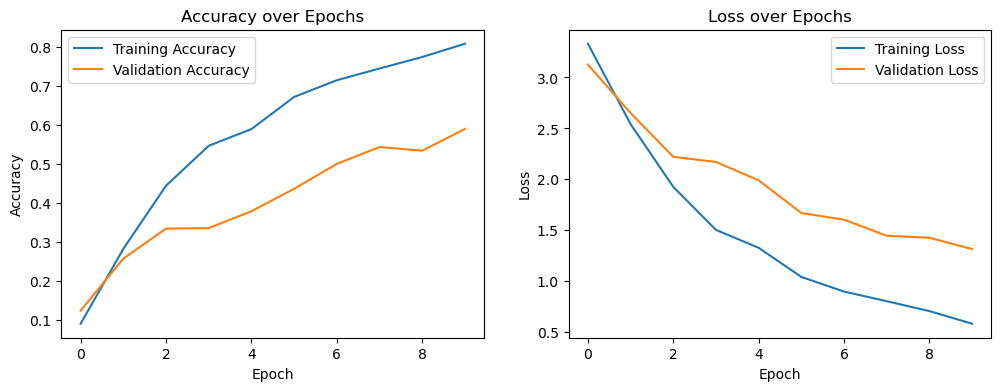

In [49]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 9: Save the model to a file
    </h1>
</div>

 

In [50]:
# Save the model
model.save('asl_model.h5')
print("Model saved as 'asl_model.h5'")


Model saved as 'asl_model.h5'


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri🔹 Step 11: Test Model on a Real Single Image Input
    </h1>
</div>

 


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹 Step 10: Test Model on a Real Single Image Input
    </h1>
</div>

 


1/1 [==============================] - 0s 70ms/step


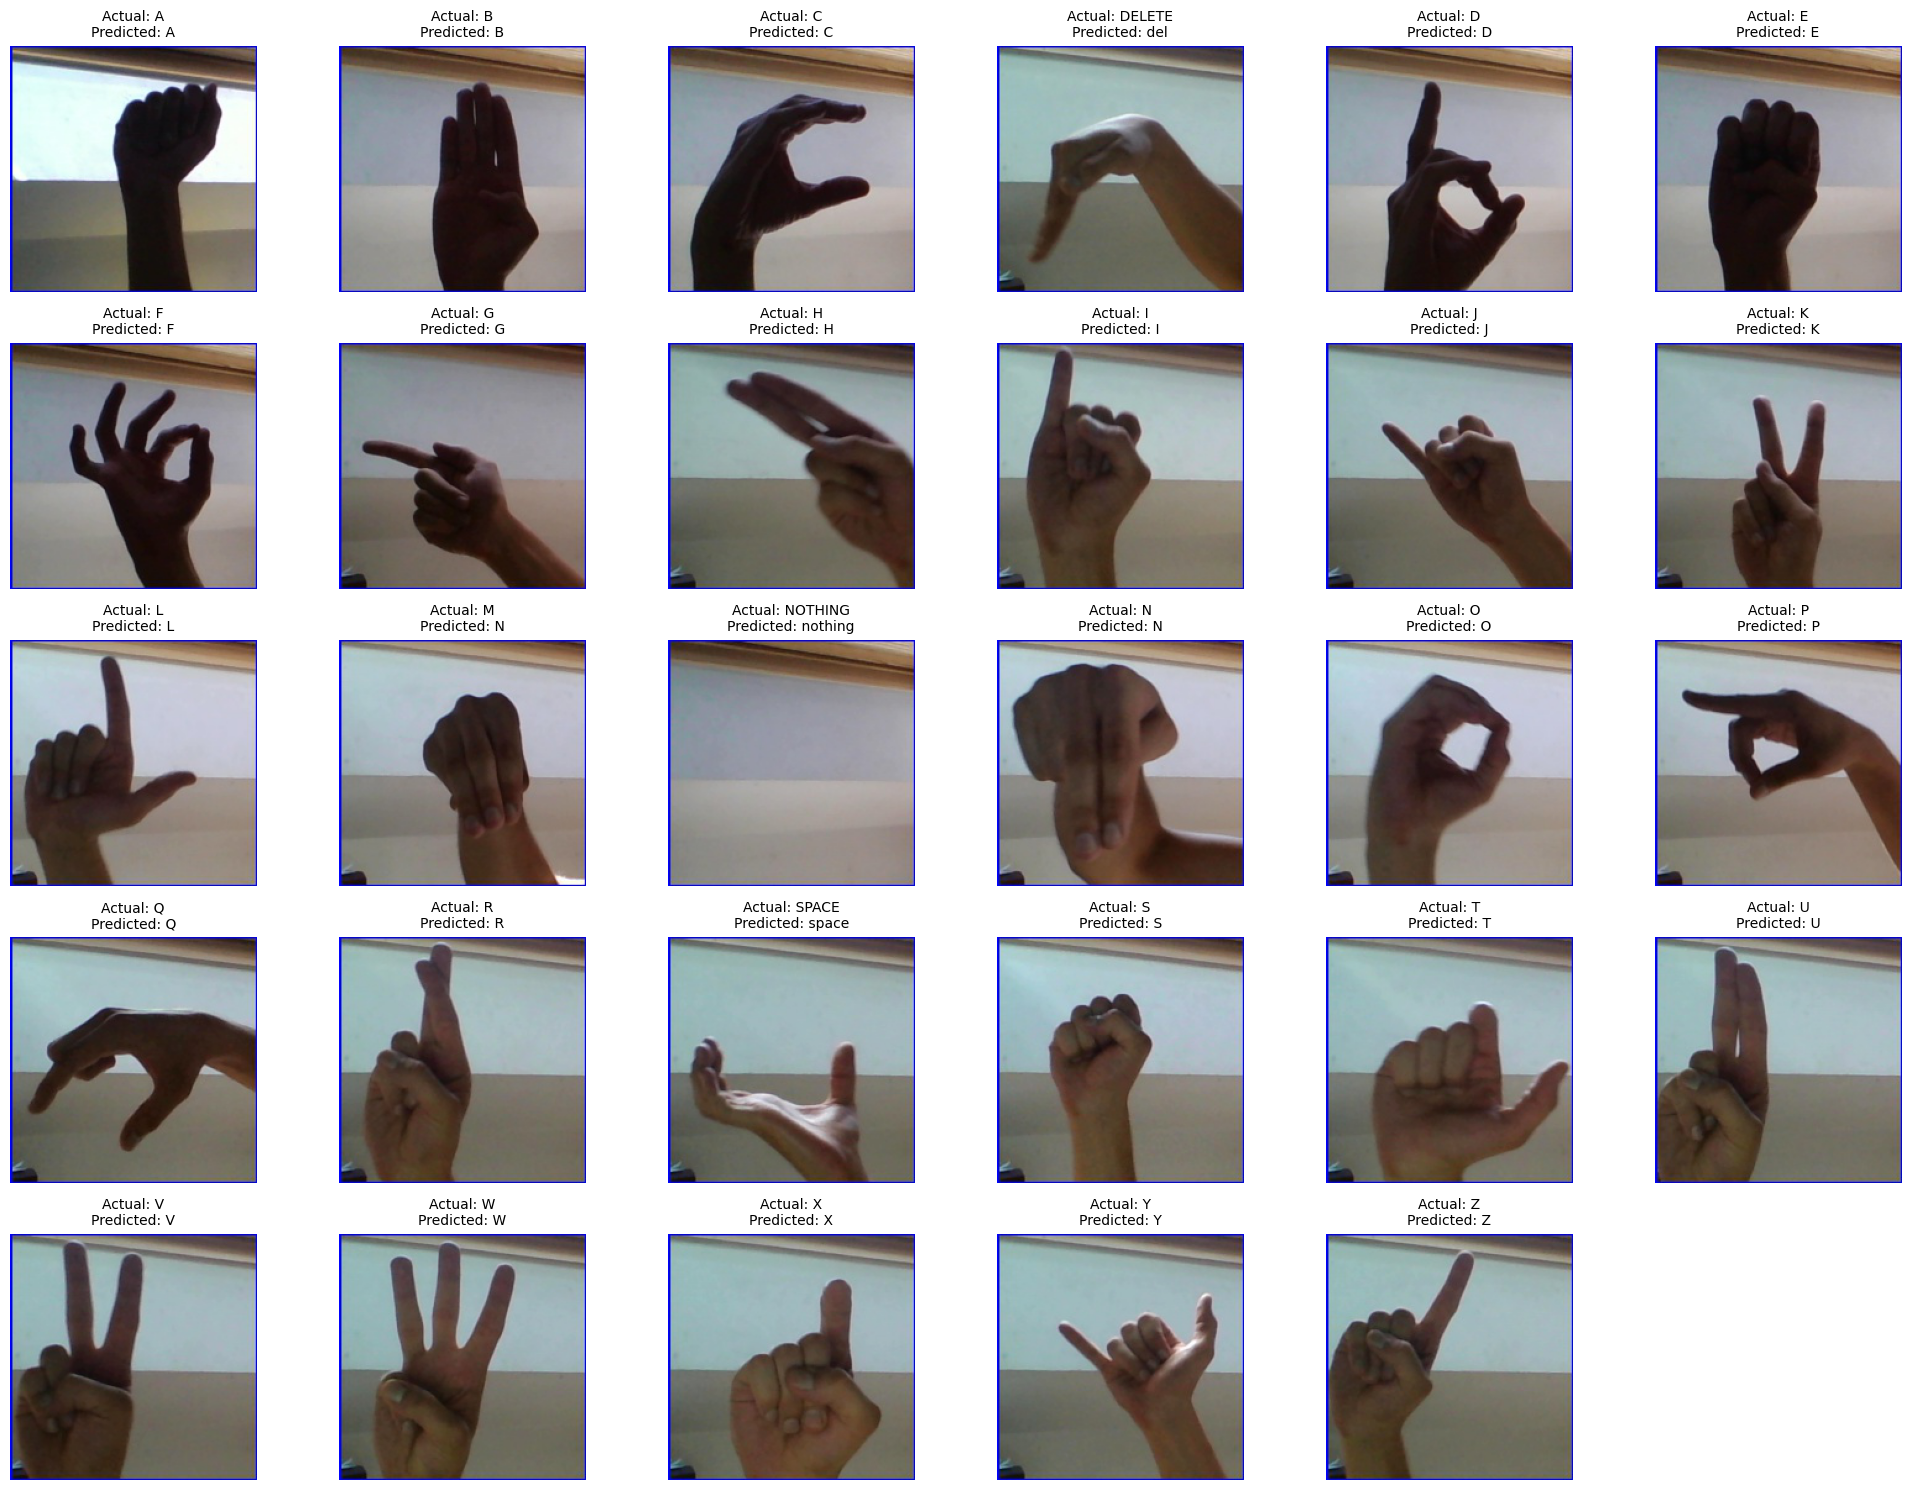

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os

# Load the trained model
model = load_model('asl_model.h5')

# Path to test images folder
test_folder = r"D:\Jupyter python\New Datasets\Unified Mentor\ASL_detection\ASL_Dataset\asl_alphabet_test"

# Get the class labels from the training generator
labels = list(train_generator.class_indices.keys())

# List all test image files
test_images = [f for f in os.listdir(test_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Set figure size
plt.figure(figsize=(20, 15))

for idx, img_file in enumerate(test_images):
    img_path = os.path.join(test_folder, img_file)

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    predicted_label = labels[predicted_class]

    # Actual label from filename (remove '_test.jpg' etc.)
    actual_label = img_file.split('_')[0].upper()

    # Plot the image
    plt.subplot(5, 6, idx + 1)  # 5 rows x 6 columns (adjust if needed)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=10)

plt.tight_layout()
plt.show()


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹 Step 11: Conclusion  
    </h1>
</div>

 


<div style="background-color: #e6f2ff; padding: 20px; border-radius: 10px;">
<p style="font-size:16px;">
In this project, we successfully built an <b>American Sign Language (ASL) Alphabet Detection Model</b> using deep learning techniques with TensorFlow and Keras. 
Starting from <b>data loading</b>, <b>preprocessing</b>, <b>model training</b>, and finally <b>testing the model</b> on real unseen images, we followed a complete end-to-end pipeline.
</p>

<ul style="font-size:16px;">
<li>We trained our model for <b>10 epochs</b>.</li>
<li>Achieved a <b>training accuracy of 80.75%</b> and a <b>validation accuracy of 58.94%</b>.</li>
<li>The model was trained on images resized to <b>200x200 pixels</b> and normalized for better convergence.</li>
</ul>

<p style="font-size:16px;">
<b>During testing:</b><br>
We tested the model on <b>29 unseen images</b> representing all <b>26 alphabets (A-Z)</b> along with <b>special characters (Space, Delete, and Nothing)</b>.<br><br>
The model predicted almost all characters <b>100% accurately</b>. Only <b>one minor misclassification</b> occurred, where the character <b>'M'</b> was predicted as <b>'N'</b>.<br>
Apart from this, <b>all other characters were predicted correctly</b>, demonstrating the model's strong generalization ability.
</p>

<p style="font-size:16px;">
<b>This project showcases the ability to:</b>
<ul>
<li>Handle multi-class image classification tasks.</li>
<li>Apply convolutional neural networks (CNNs) effectively for real-world problems.</li>
<li>Build a complete machine learning workflow from training to deployment.</li>
</ul>
</p>

<p style="font-size:16px;">
With minor improvements such as fine-tuning hyperparameters, using more epochs, applying data augmentation, or experimenting with more advanced architectures, the model’s performance can be improved even further.
</p>

<p style="font-size:16px;">
Overall, the model performs very well and serves as a strong baseline for American Sign Language alphabet recognition tasks.
</p>

</div>
 
